<center><h1>Machine Learning Assignment</h1></center>

<h3>1.	Importing Libraries/Dataset</h3>

<h4>1.a) Importing Libraries</h4>

In [4]:
import pandas as pd

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import prettytable
# from matplotlib import pyplot as plt
# from scipy.stats import skew
# from prettytable import PrettyTable


# For feature selections and Feature Engineering
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder


# Importing the DecisionTreeClassifier and LogisticRegressionClassifier for model building
# from sklearn import tree
# from sklearn.linear_model import LogisticRegression


# For Analyzing the models
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_curve, roc_auc_score

<h4>1.b) Importing Dataset</h4>

In [5]:
# Importing Dataset of AmesHousing.csv put at same level as this file
df1 = pd.read_csv('AmesHousing.csv') 

<h3>2.	Data Visualization and Exploration</h3>

<h4>2.a) Print 2 rows for sanity check</h4>

In [6]:
df1.head(2)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


<h4>2.b) Class imbalance with appropriate visualization method</h4>

In [6]:
df1.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


C:\Users\685239\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


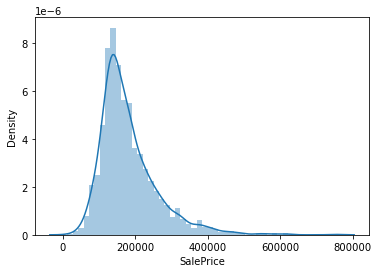

In [5]:
sns.distplot(df1['SalePrice'])

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

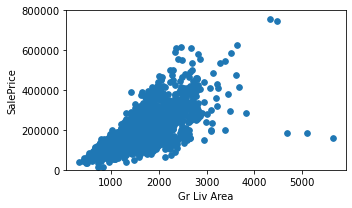

In [18]:
var = 'Gr Liv Area'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32)

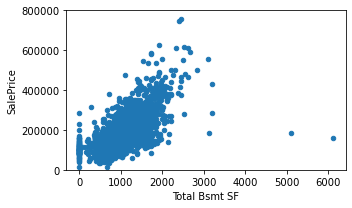

In [21]:
var = 'Total Bsmt SF'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

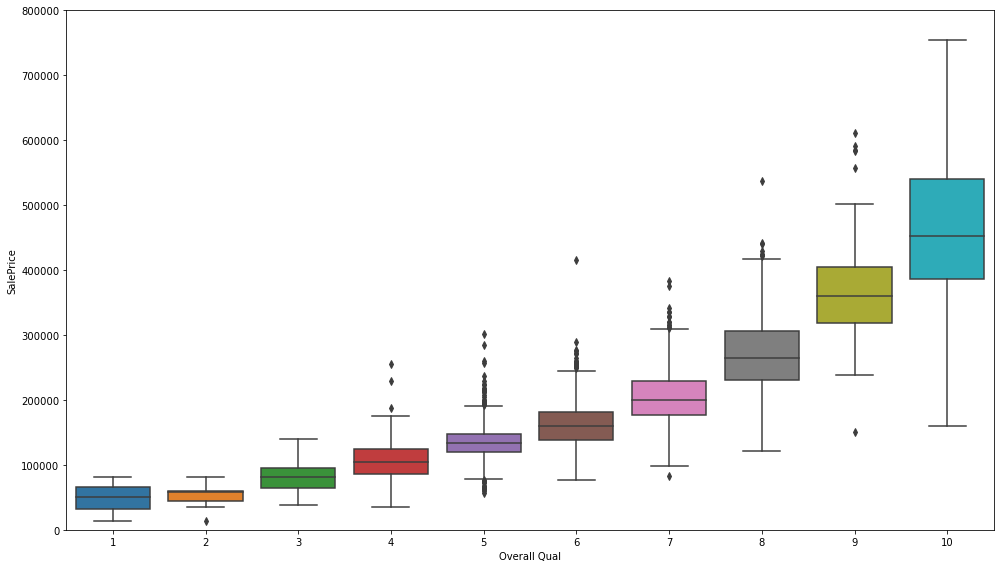

In [22]:
var = 'Overall Qual'
data = pd.concat([df1['SalePrice'], df1[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

<AxesSubplot:>

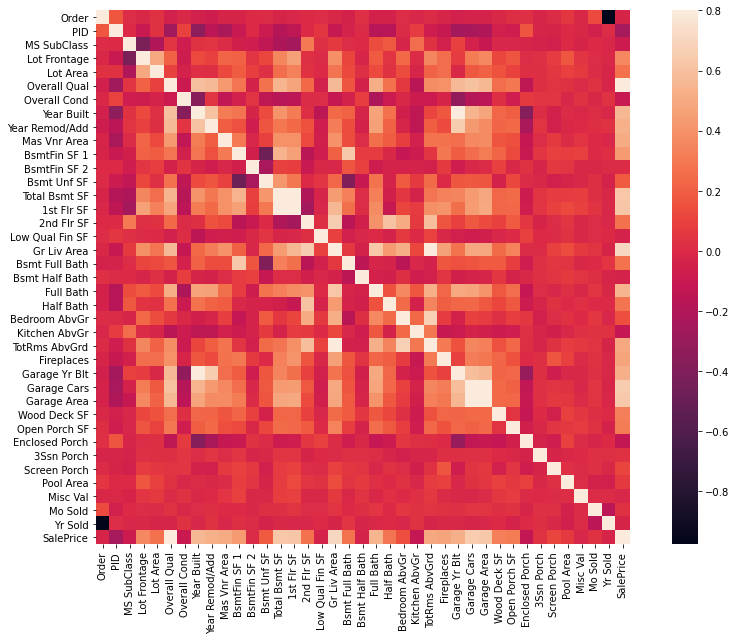

In [23]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

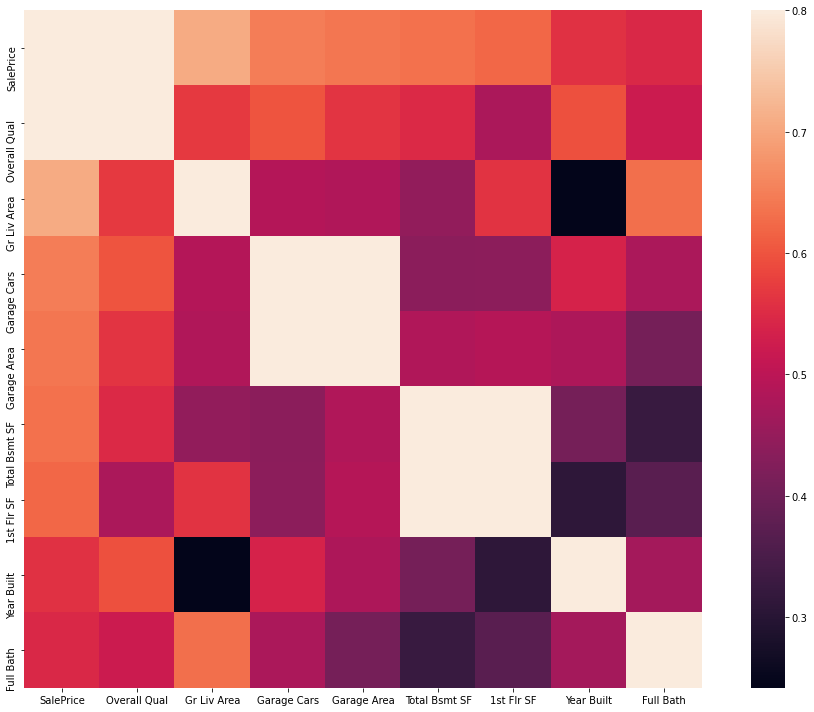

In [24]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df1[cols].corr(), vmax=.8, square=True);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


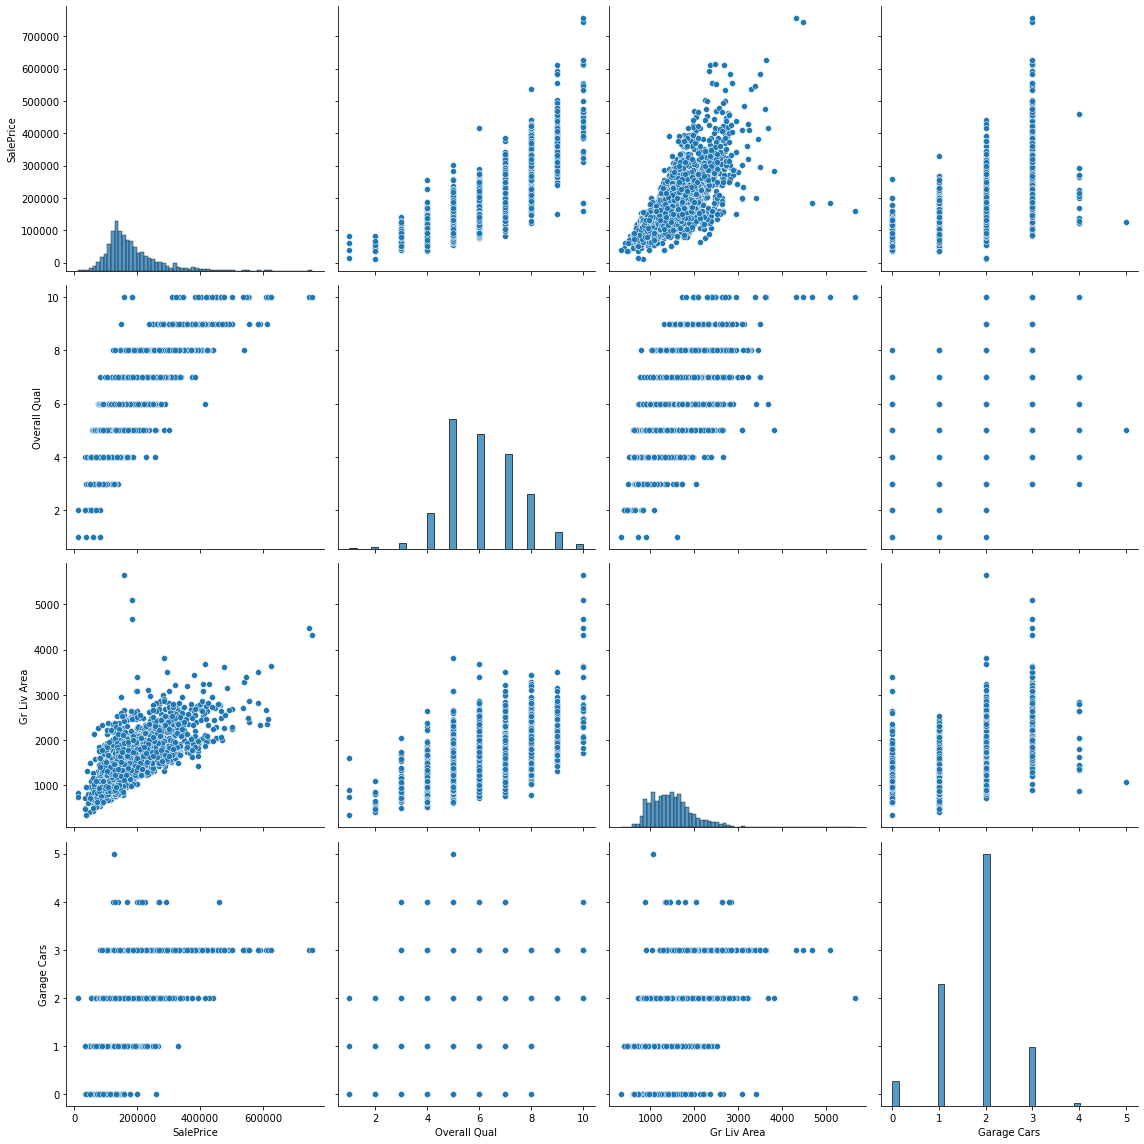

In [26]:
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars']
sns.pairplot(df1[cols], size = 4);

3.	Data Pre-processing and cleaning [2M]
    1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. 
    2.	Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks


In [27]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool QC,2917,0.995563
Misc Feature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
Fireplace Qu,1422,0.485324
Lot Frontage,490,0.167235
Garage Cond,159,0.054266
Garage Finish,159,0.054266
Garage Yr Blt,159,0.054266
Garage Qual,159,0.054266


Predicting the sale price
Preparing the data
Feature scaling
We will do a little preprocessing to our data using the following formula (standardization):

x′=(x−μ)/σ 

where  μ  is the population mean and  σ  is the standard deviation.

In [29]:
x = df1['Gr Liv Area']
y = df1['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [30]:
x.shape

(2930, 2)